In [240]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [241]:
books_rating = pd.read_csv('Books_Data_Clean.csv')
df = books_rating.copy()
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lewis, Dennis O'Neil",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [244]:
df.isnull().sum()

index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

## Data Cleaning

In [246]:
df = df.dropna()
df.isnull().sum()

index                  0
Publishing Year        0
Book Name              0
Author                 0
language_code          0
Author_Rating          0
Book_average_rating    0
Book_ratings_count     0
genre                  0
gross sales            0
publisher revenue      0
sale price             0
sales rank             0
Publisher              0
units sold             0
dtype: int64

## Data Discovery

In [247]:
df.nunique()

index                  998
Publishing Year        147
Book Name              996
Author                 698
language_code            8
Author_Rating            4
Book_average_rating    132
Book_ratings_count     992
genre                    4
gross sales            775
publisher revenue      568
sale price             139
sales rank             815
Publisher                9
units sold             478
dtype: int64

In [248]:
# What are language code unique variables
df["language_code"].unique()

array(['en-US', 'eng', 'spa', 'en-GB', 'fre', 'en-CA', 'nl', 'ara'],
      dtype=object)

In [249]:
# What are Publisher unique variables
df["Publisher "].unique()

array(['HarperCollins Publishers', 'Amazon Digital Services,  Inc.',
       'Hachette Book Group', 'Penguin Group (USA) LLC',
       'Random House LLC', 'Simon and Schuster Digital Sales Inc',
       'Macmillan', 'HarperCollins Publishing',
       'HarperCollins Christian Publishing'], dtype=object)

In [250]:
# Statistics of numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,998.0,529.619238,308.616860,0.00,263.2500,530.500,793.7500,1069.00
Publishing Year,998.0,1971.070140,190.019592,-560.00,1985.0000,2003.000,2010.0000,2016.00
Book_average_rating,998.0,4.003056,0.247360,2.97,3.8500,4.010,4.1700,4.77
Book_ratings_count,998.0,95500.622244,31650.845116,27308.00,70946.5000,89901.000,115596.0000,206792.00
gross sales,998.0,1885.085150,4023.268770,104.94,370.8825,806.250,1492.9650,47795.00
publisher revenue,998.0,848.897952,2303.504061,0.00,0.0000,260.619,721.1805,28677.00
sale price,998.0,4.839649,3.585046,0.99,1.9900,3.990,6.9900,33.86
sales rank,998.0,605.750501,369.174705,1.00,283.0000,591.500,919.5000,1273.00
units sold,998.0,9802.312625,15503.088302,106.00,555.0000,3915.000,5420.2500,61560.00


In [251]:
# Are there any publishers who sell the same book more than once
duplicate_books = df.groupby("Book Name")["Publisher "].nunique()

# Show books with number of different publishers greater than 1
duplicate_books = duplicate_books[duplicate_books > 1]
print(duplicate_books)

Book Name
Persepolis       2
The Awakening    2
Name: Publisher , dtype: int64


In [252]:
a = df[df["Book Name"] == "The Awakening"]
print(a.get(["sale price", "Publisher "]))
b = df[df["Book Name"] == "Persepolis"]
print(b.get(["sale price", "Publisher "]))

     sale price                            Publisher 
251        0.99        Amazon Digital Services,  Inc.
696        6.45  Simon and Schuster Digital Sales Inc
     sale price                      Publisher 
297        4.99                Random House LLC
933        0.99  Amazon Digital Services,  Inc.


In [253]:
# Average sales price by genre
g_price = df.groupby("genre")["sale price"];
print(g_price.mean())

genre
children         6.126667
fiction          5.119091
genre fiction    4.655194
nonfiction       5.530192
Name: sale price, dtype: float64


In [254]:
# Average sale price by genre and Publisher
pivot_table = df.pivot_table(index=["Publisher ", "genre"], values="sale price", aggfunc="mean").reset_index()

print(pivot_table)

                              Publisher           genre  sale price
0         Amazon Digital Services,  Inc.       children    6.850000
1         Amazon Digital Services,  Inc.        fiction    3.062500
2         Amazon Digital Services,  Inc.  genre fiction    3.021335
3         Amazon Digital Services,  Inc.     nonfiction    3.908649
4                    Hachette Book Group        fiction    5.635000
5                    Hachette Book Group  genre fiction    6.879762
6                    Hachette Book Group     nonfiction    4.980000
7     HarperCollins Christian Publishing     nonfiction    5.240000
8               HarperCollins Publishers       children    1.990000
9               HarperCollins Publishers        fiction    6.406667
10              HarperCollins Publishers  genre fiction    7.021667
11              HarperCollins Publishers     nonfiction    5.483125
12              HarperCollins Publishing     nonfiction    5.700000
13                             Macmillan       c

## Marketing Analysis

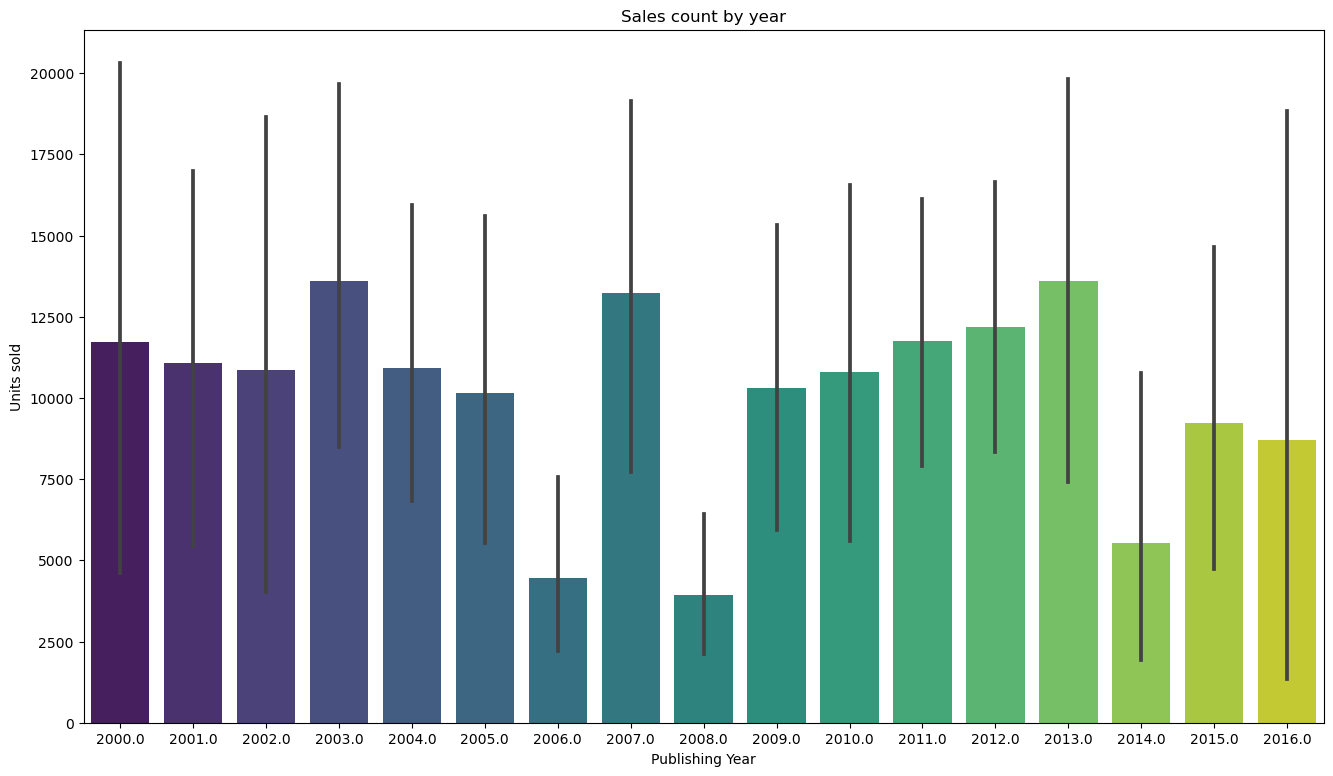

In [255]:
# What are the sales data on a yearly basis?
df_after_2000 = df[df['Publishing Year'] >= 2000]


plt.figure(figsize=(16,9))
sns.barplot(x=df_after_2000["Publishing Year"],  y=df_after_2000["units sold"], palette='viridis')
plt.xlabel("Publishing Year")
plt.ylabel("Units sold")
plt.title("Sales count by year")
plt.show()

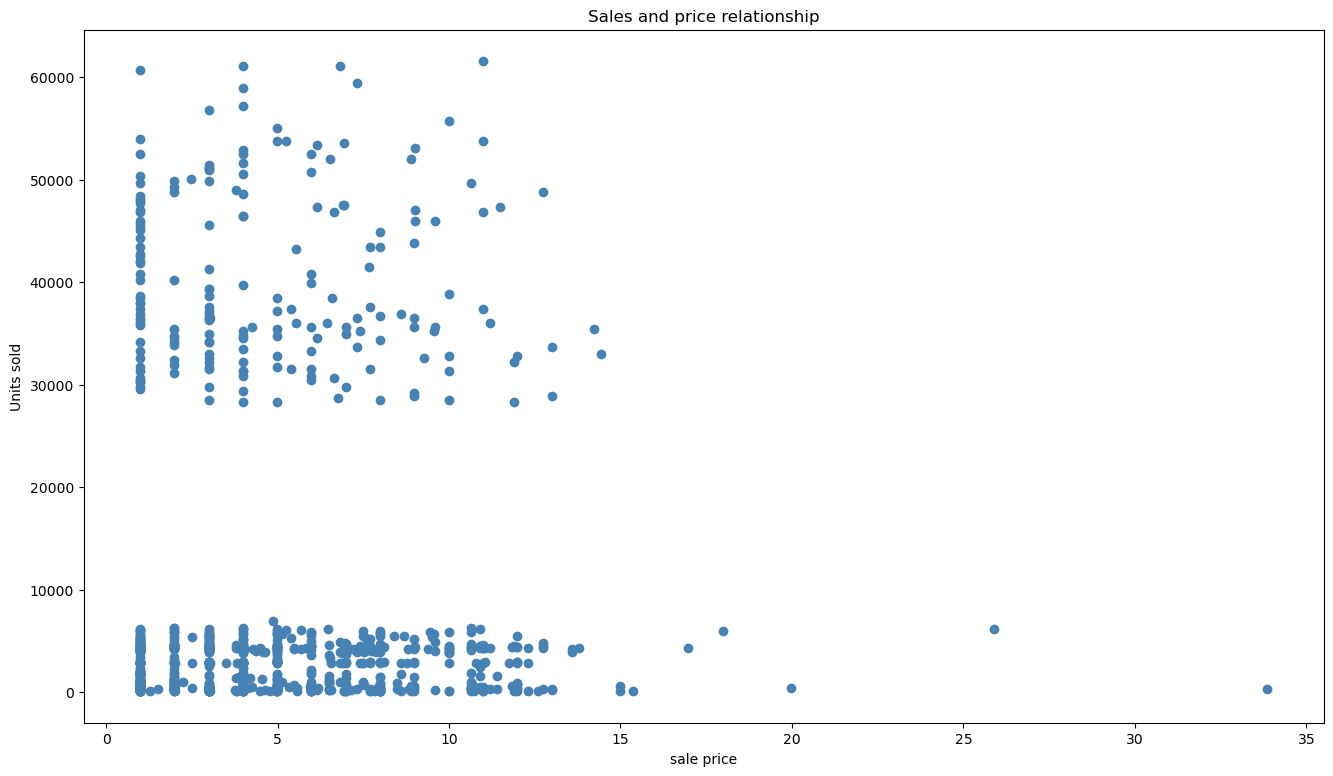

In [256]:
# What is the relationship between units sold and price?
plt.figure(figsize=(16,9))
plt.scatter(x=df["sale price"],  y=df["units sold"], color="steelblue")
plt.xlabel("sale price")
plt.ylabel("Units sold")
plt.title("Sales and price relationship")
plt.show()

The cheaper ones have more sales as expected

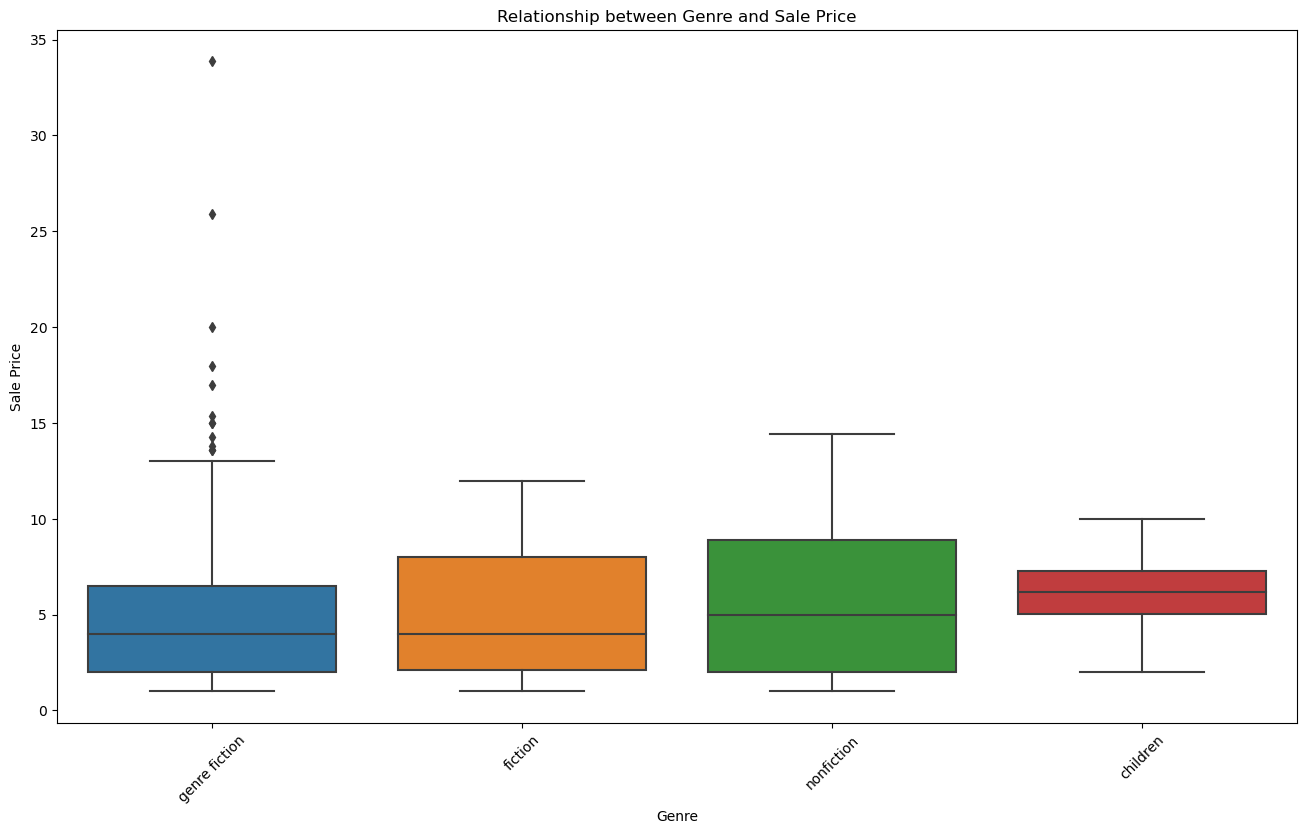

In [257]:
plt.figure(figsize=(16, 9))
sns.boxplot(x='genre', y='sale price', data=df)
plt.xlabel('Genre')
plt.ylabel('Sale Price')
plt.title('Relationship between Genre and Sale Price')
plt.xticks(rotation=45)
plt.show()

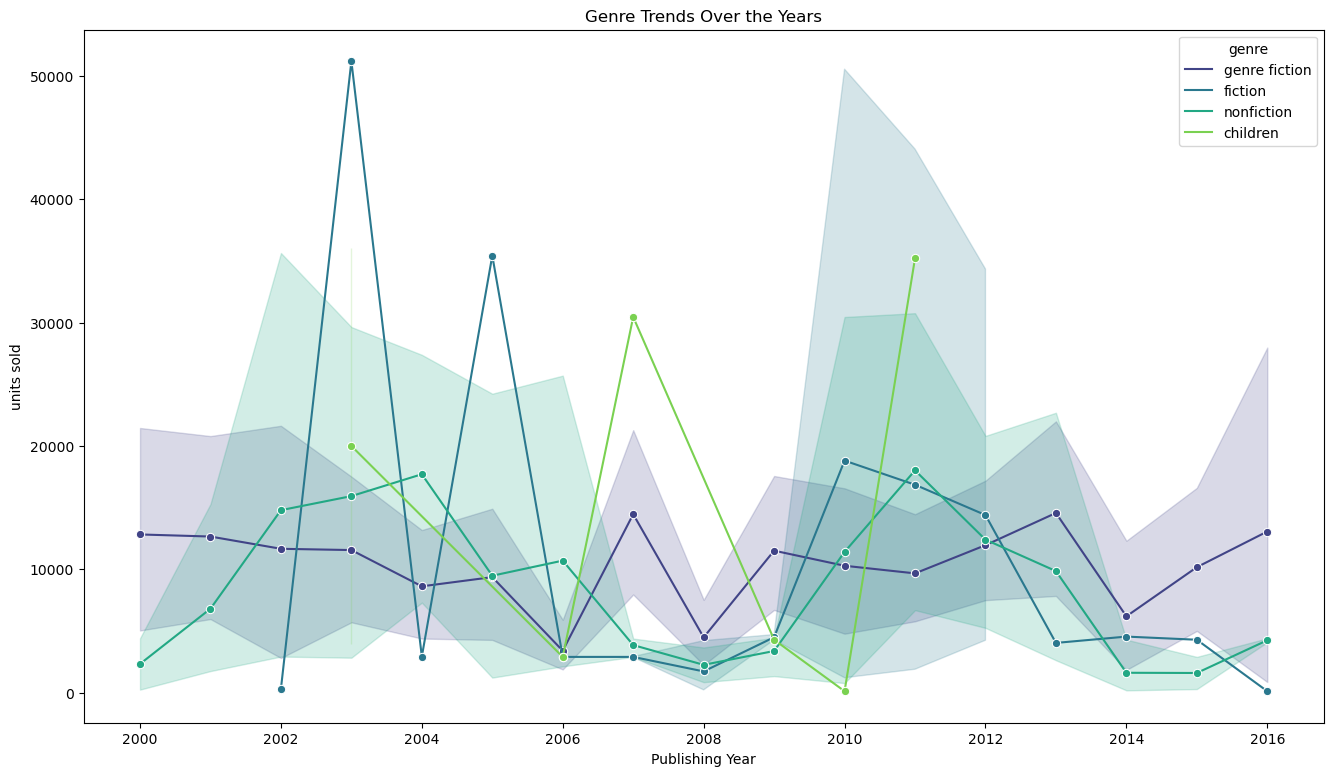

In [258]:
plt.figure(figsize=(16,9))
sns.lineplot(x='Publishing Year', y='units sold', hue='genre', data=df_after_2000, marker='o', palette='viridis')
plt.title("Genre Trends Over the Years")
plt.show()

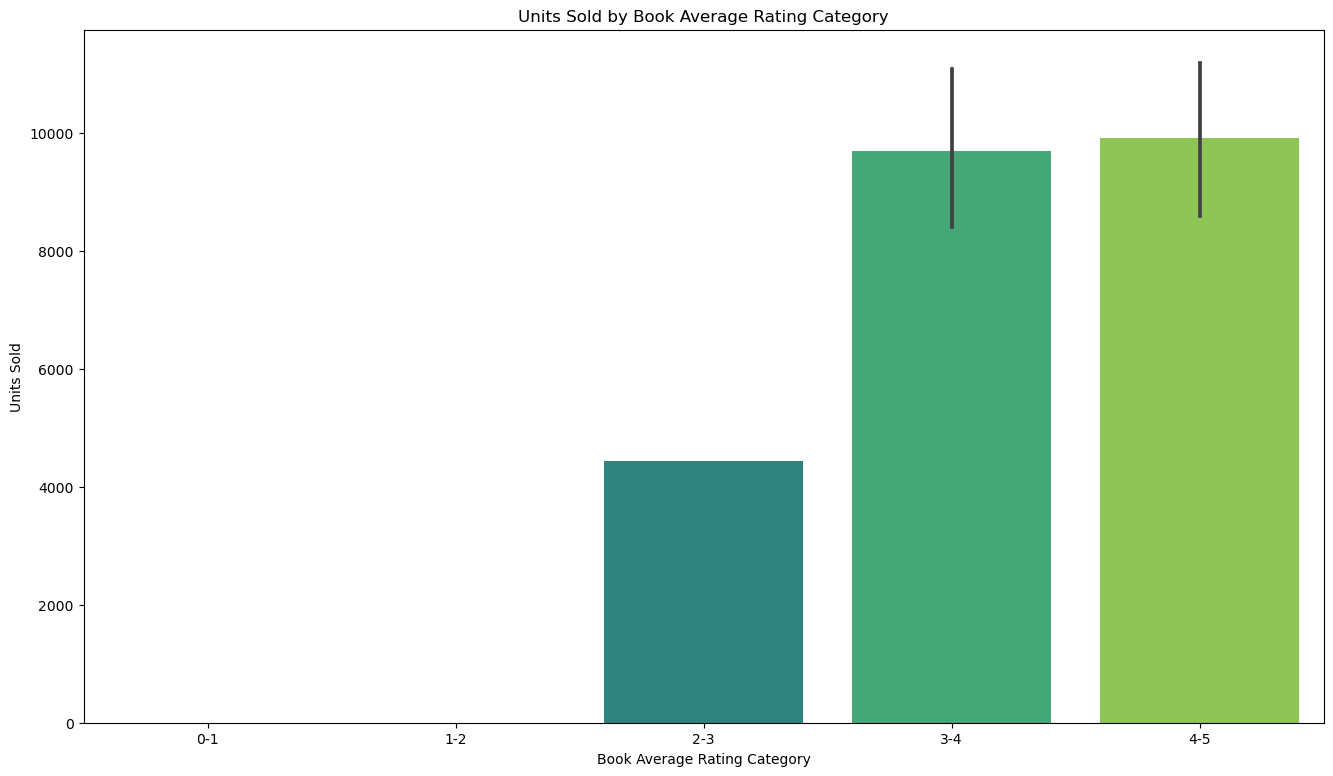

In [259]:
# Limiting book_average_rating variables to 0-5
df['Rating_Category'] = pd.cut(df['Book_average_rating'], bins=[0, 1, 2, 3, 4, 5], labels=['0-1', '1-2', '2-3', '3-4', '4-5'])

plt.figure(figsize=(16, 9))
sns.barplot(x='Rating_Category', y='units sold', data=df, palette='viridis')
plt.xlabel("Book Average Rating Category")
plt.ylabel("Units Sold")
plt.title("Units Sold by Book Average Rating Category")
plt.show()

## Predict Number of Sales

In [260]:
dms = pd.get_dummies(df[["genre", "Author_Rating", "Rating_Category"]]).astype("float64")
numeric_cols = df[[ "sale price", "Publishing Year", "sales rank"]]

y = df["units sold"]
X = pd.concat([dms, numeric_cols], axis = 1)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [261]:
# model
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('regressor', RandomForestRegressor() )
])
pipe.fit(X_train, y_train) 
y_pred = pipe.predict( X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model r2score: ", r2)
print("Model mse: ", np.sqrt(mse))

Model r2score:  0.933626404500236
Model mse:  3960.566918330821


In [262]:
# real data, predict and error
k_t = pd.DataFrame({"Real_y": y[:10],
                   "Predict_y": y_pred[:10]})

k_t["Error"] = k_t["Real_y"] - k_t["Predict_y"]
k_t

,Real_y,Predict_y,Error
0,7000,4530.06,2469.94
1,6250,2889.00,3361.00
2,5500,435.20,5064.80
3,5500,248.86,5251.14
4,4750,2939.22,1810.78
5,4000,49483.44,-45483.44
6,3933,4400.00,-467.00
7,3800,58911.84,-55111.84
8,3733,4619.16,-886.16
9,3666,34644.24,-30978.24
